In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


# First test with Scylla

- JIRA ticket: https://jira.lsstcorp.org/browse/DM-4692


First run was done with ~150k visits:
- No replication
- All data on a single disk (no RAID)

In [4]:
data_files_scylla1 = [
    "data/DM-24692/apdb-pdac-scylla1-20200430T203116.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200501T010552.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200501T083221.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200501T181829.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200502T063633.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200502T213234.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200503T145856.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200504T104023.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200505T090919.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200506T090737.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200507T090742.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200508T090805.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200509T090813.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200510T090844.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200511T100930.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200512T100950.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200513T101020.csv.gz",
]

In [5]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files_scylla1]

In [6]:
df_scylla1 = pd.concat(frames)
del frames

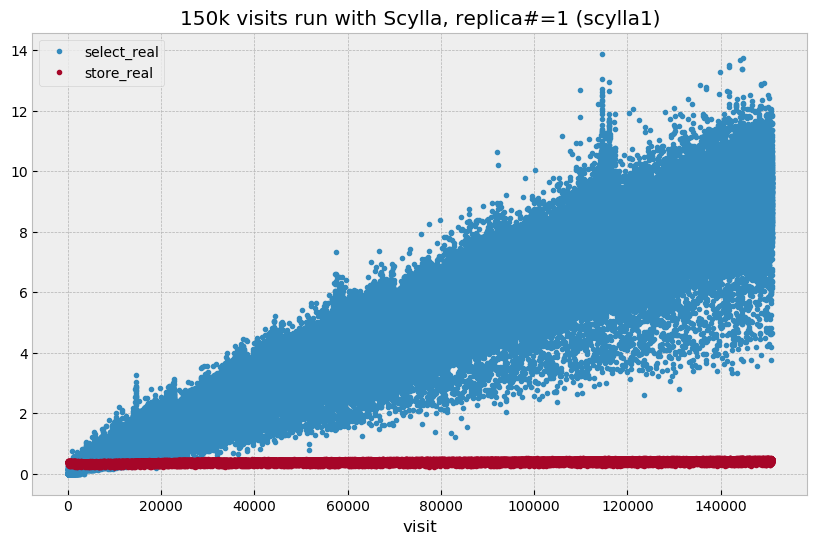

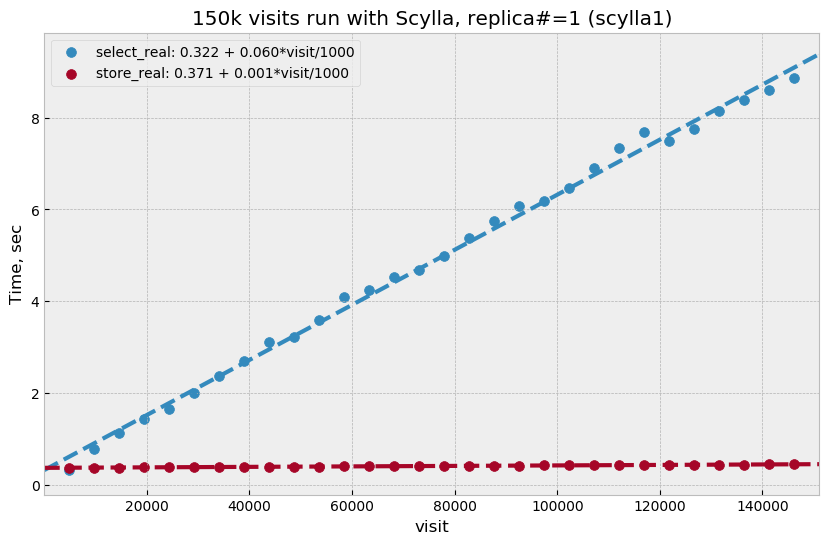

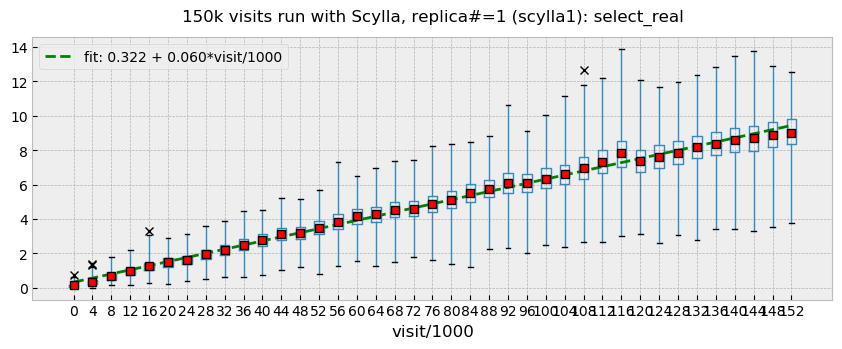

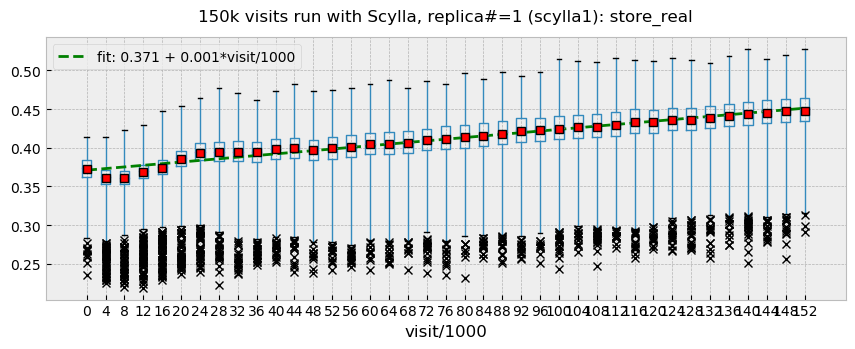

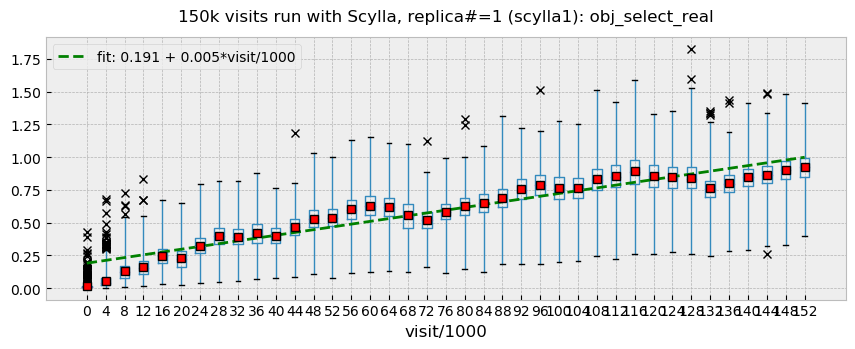

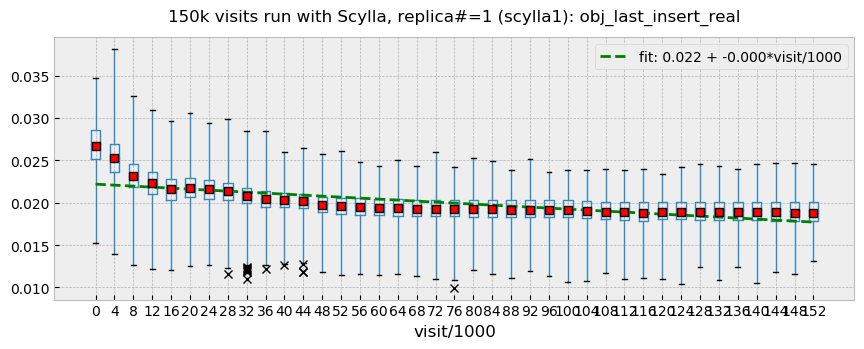

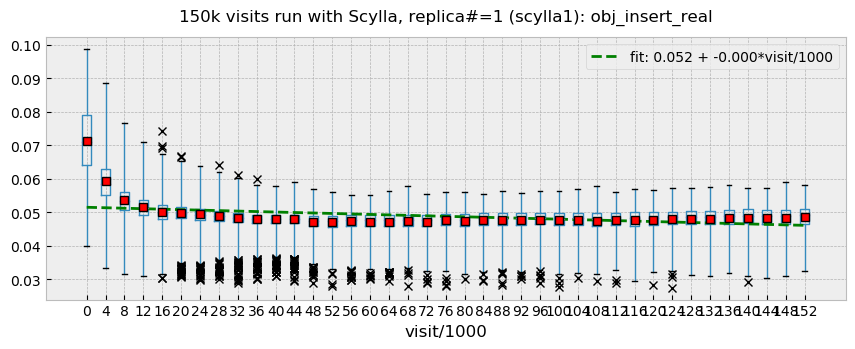

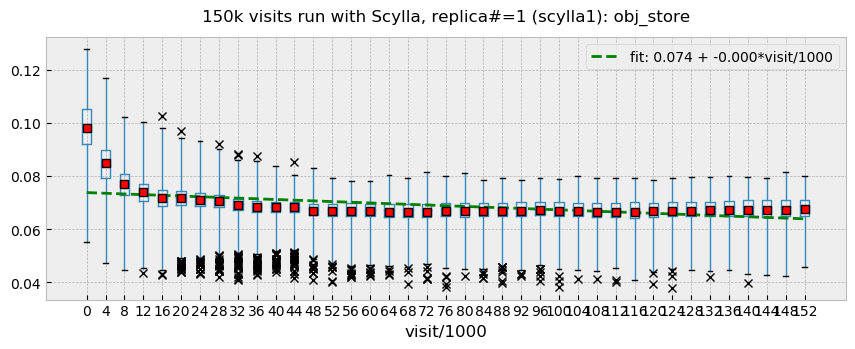

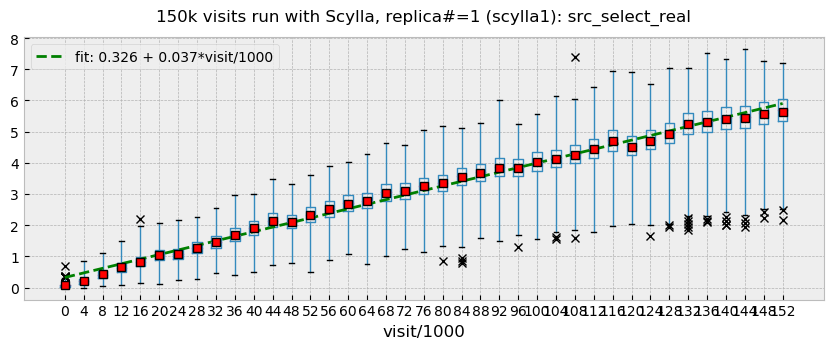

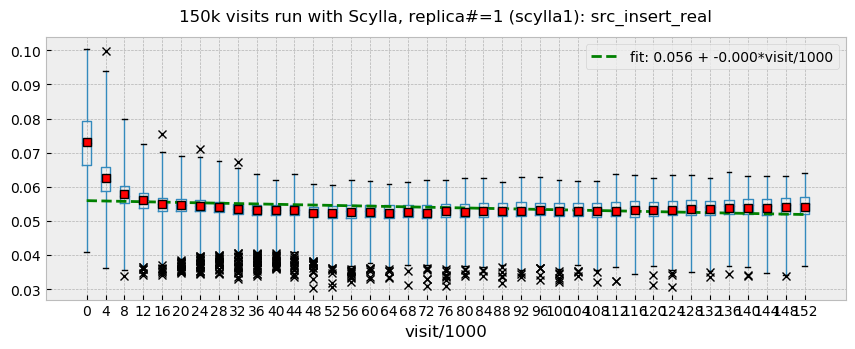

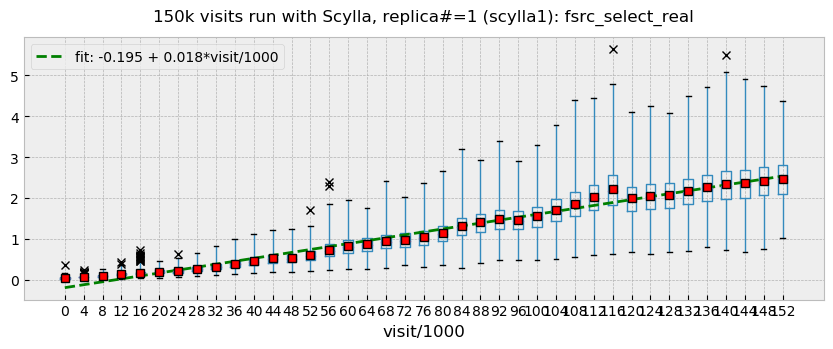

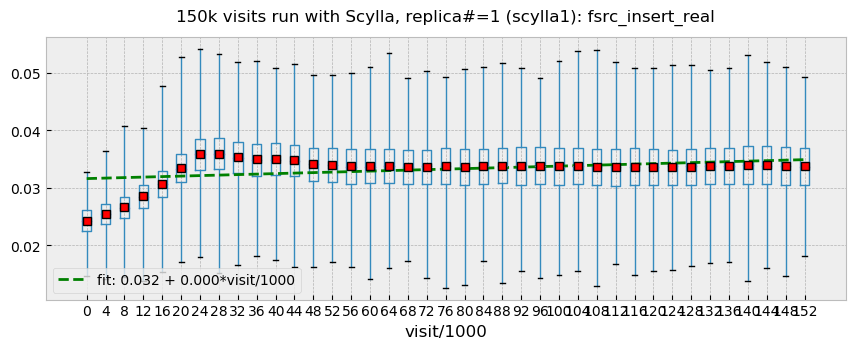

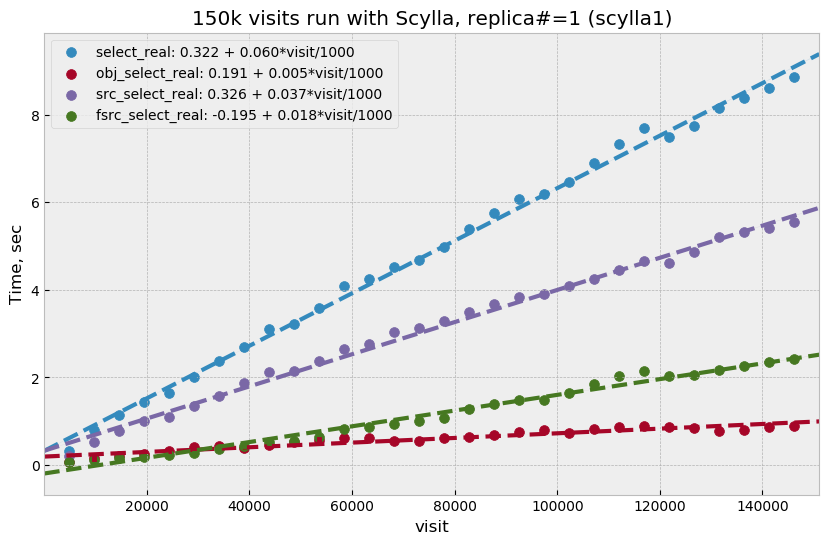

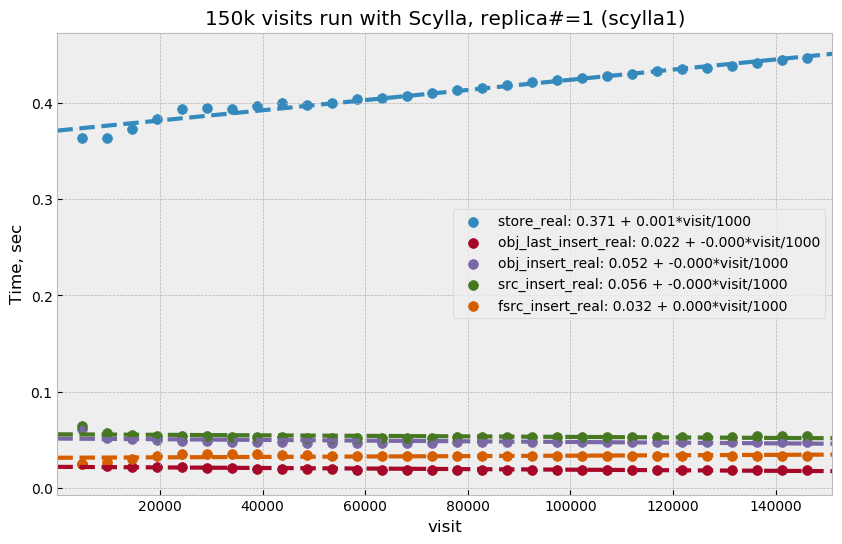

In [7]:
title = "150k visits run with Scylla, replica#=1 (scylla1)"
plots.do_plots_all(df_scylla1, title, bin=4000, plots=all_plots, whis=whiskers);